<a href="https://colab.research.google.com/github/AdrianRamos956/Homeworks/blob/main/HW4_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW4 Skeleton code

% import necessary modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

% Q1 setup

In [ ]:
import scipy.stats as stats
import numpy.random as rn

In [ ]:
rn.seed(0)

% Q1a

In [ ]:
m = 10**5;  # number of coins
N = 16; # number of tosses each coin

Generate headCounts and plot histogram in the cell below

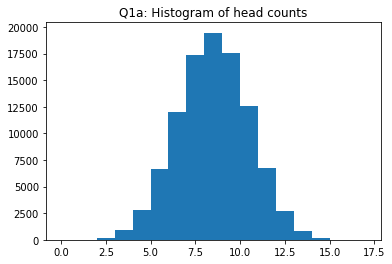

In [ ]:
plt.figure()
plt.title('Q1a: Histogram of head counts')

tosses = np.random.uniform(size=(10**5,16))
heads = tosses>0.5
headCounts = heads.sum(axis=1)

plt.hist(headCounts, bins=range(18))

plt.show()

% Q1b

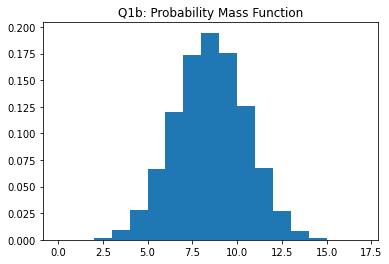

In [ ]:
plt.figure()
plt.title('Q1b: Probability Mass Function')

count=plt.hist(headCounts, bins=range(18), density=True)

plt.show()

% Q1c

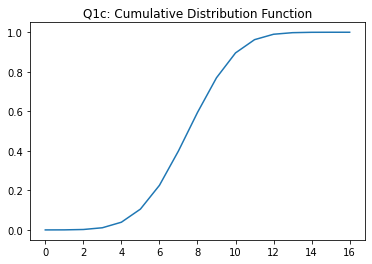

In [ ]:
plt.figure()
plt.title('Q1c: Cumulative Distribution Function')

Empirical_CDF = np.cumsum(count[0])
plt.plot(range(17), Empirical_CDF)

plt.show()

% Q1d

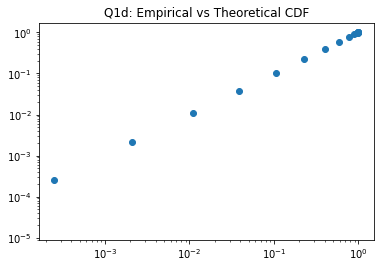

In [ ]:
plt.figure()
plt.title('Q1d: Empirical vs Theoretical CDF')

Theoretical_CDF = stats.binom.cdf(range(17), 16, 0.5)

plt.plot(Empirical_CDF, Theoretical_CDF, 'o')

plt.xscale('log')
plt.yscale('log')


plt.show()

% Q1e

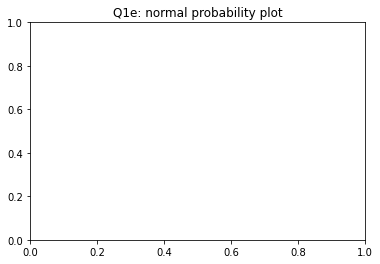

In [ ]:
plt.figure()
plt.title('Q1e: normal probability plot')
plt.show()

% Q1f

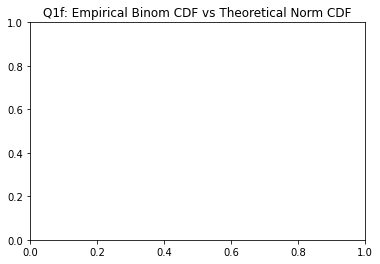

In [ ]:
plt.figure()
plt.title('Q1f: Empirical Binom CDF vs Theoretical Norm CDF')
plt.show()

% Q2 (2e,2f optional)

2a, simulate fair coin and collect headCountsFair

In [ ]:
tosses = np.random.uniform(size=(10**3,10))
heads = tosses>0.5
headCountsFair = heads.sum(axis=1)

2b, simulate loadd coin and collect headCountsLoaded

In [ ]:
tosses = np.random.uniform(size=(10**3,10))
heads = tosses<0.6
headCountsLoaded = heads.sum(axis=1)

2c, plot both headCounts on the same figure

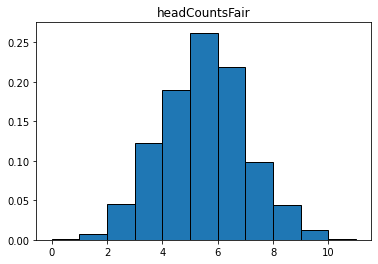

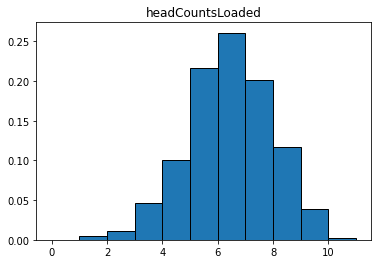

In [ ]:
plt.figure()
plt.title('headCountsFair')
plt.hist(headCountsFair, bins=range(12), density=True, edgecolor='black')
#plt.hist(headCountsLoaded, bins=range(12), density=True, edgecolor='black')
plt.show()

plt.figure()
plt.title('headCountsLoaded')
plt.hist(headCountsLoaded, bins=range(12), density=True, edgecolor='black')
plt.show()

2d, perform ttest and print out p-value; also print out a statement about whether or not there is statistically significant difference between the two sets of coins

In [ ]:
stats.ttest_ind(headCountsLoaded,headCountsFair)

Ttest_indResult(statistic=13.394858726075686, pvalue=3.029788788494061e-39)

% Q2e (Write a for loop to) repeat Q2a, Q2b and Q2d (with only 10 fair coins and 10 loaded coins) 10 times and count the number of times that you got a p-value <= 0.05

% Q2f (Write a for loop to) repeat Q2a, Q2b and Q2d 1000 times, but with two sets of coins that are all fair coins, and count number of times that you got a p-value <= 0.05

% Q3 setup

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/jianhuaruan/3753/main/'
# uncomment below to run locally
# url = ''
data = pd.read_csv(url + 'brfss2.csv', index_col=0)
data = data.drop('wtkg2',axis=1).dropna(axis=0, how='any').values
data.shape

(385974, 5)

data is now a numpy array and the columns are age, current weight (kg), <br>
last year's weight (kg), height (cm), and gender (1: male; 2: female).

% Q3a: Display summary statistics of three selected columns

In [ ]:
Final = np.zeros((3,6))


TempMin = data.min(axis = 0)
Final[0,0] = TempMin[1]
Final[1,0] = TempMin[2]
Final[2,0] = TempMin[3]

TempMax = data.max(axis = 0)
Final[0,1] = TempMax[1]
Final[1,1] = TempMax[2]
Final[2,1] = TempMax[3]

TempMean = data.mean(axis = 0)
Final[0,2] = TempMean[1]
Final[1,2] = TempMean[2]
Final[2,2] = TempMean[3]

TempMedian = np.median(data,axis=0)
Final[0,3] = TempMedian[1]
Final[1,3] = TempMedian[2]
Final[2,3] = TempMedian[3]

TempSTD = np.std(data,axis=0)
Final[0,4] = TempSTD[1] + TempMean[1]
Final[1,4] = TempSTD[2] + TempMean[2]
Final[2,4] = TempSTD[3] + TempMean[3]

TempSTD = np.std(data,axis=0)
Final[0,5] = TempMean[1] - TempSTD[1]
Final[1,5] = TempMean[2] - TempSTD[2]
Final[2,5] = TempMean[3] - TempSTD[3]

print(Final)

[[ 20.         300.          79.0614634   77.27272727  98.57572078
   59.54720601]
 [ 22.72727273 342.27272727  79.80518636  77.27272727 100.38403125
   59.22634147]
 [ 61.         236.         169.01344132 168.         179.40229775
  158.62458489]]


% Q3b: scatter plots and Pearson correlation coefficients

The Correlation between weight_change and age is  -0.06867582903526567
The Correlation between weight_change and current_weigh is  0.034132175224082885
The Correlation between weight_change and weight_a_year_ago is  -0.31911696303346515


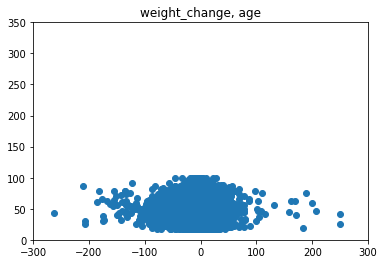

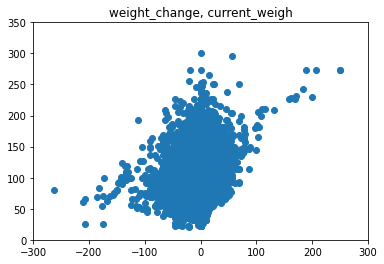

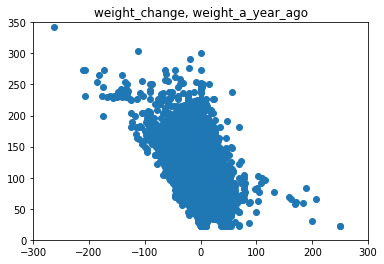

In [ ]:
ageAll = data[:,0]
current_weighAll = data[:,1]
weight_a_year_agoAll = data[:,2]

weight_change = current_weighAll - weight_a_year_agoAll

temp1 = np.corrcoef(weight_change, ageAll)
temp2 = np.corrcoef(weight_change, current_weighAll)
temp3 = np.corrcoef(weight_change, weight_a_year_agoAll)

print("The Correlation between weight_change and age is ", temp1[0,1])
print("The Correlation between weight_change and current_weigh is ", temp2[0,1])
print("The Correlation between weight_change and weight_a_year_ago is ", temp3[0,1])

plt.figure()
plt.title('weight_change, age')
plt.scatter(weight_change, ageAll)
plt.ylim(0.0,350.0, 25.0)
plt.xlim(-300,300,20)
plt.show()

plt.figure()
plt.title('weight_change, current_weigh')
plt.scatter(weight_change, current_weighAll)
plt.ylim(0.0,350.0, 25.0)
plt.xlim(-300,300,20)
plt.show()

plt.figure()
plt.title('weight_change, weight_a_year_ago')
plt.scatter(weight_change, weight_a_year_agoAll)
plt.ylim(0.0,350.0, 25.0)
plt.xlim(-300,300,20)
plt.show()

% Q3c: compare weight_change for men and women: mean, SEM, t-test

In [ ]:
maleweight_changeAll = data[:,:]
femaleweight_changeAll = data[:,:]

allFemales = np.delete(data, np.where((data == 1))[0], axis=0)
allMales = np.delete(data, np.where((data == 2))[0], axis=0)

current_weighAllFemale = allFemales[:,1]
weight_a_year_agoAllFemale = allFemales[:,2]
weight_changeFemale = current_weighAllFemale - weight_a_year_agoAllFemale

current_weighAllMale = allMales[:,1]
weight_a_year_agoAllMale = allMales[:,2]
weight_changeMale = current_weighAllMale - weight_a_year_agoAllMale

print("The Mean Weight Change in Females is " , np.mean(weight_changeFemale), "and the SEM is ",stats.sem(weight_changeFemale))
print("The Mean Weight Change in Females is " , np.mean(weight_changeMale), "and the SEM is ",stats.sem(weight_changeMale))
stats.ttest_ind(weight_changeFemale, weight_changeMale)

The Mean Weight Change Mean in Females is  -0.672111498300853 and the SEM is  0.015327456384406383
The Mean Weight Change Mean in Females is  -0.8559857662178697 and the SEM is  0.017780975514333063


Ttest_indResult(statistic=7.701843115268436, pvalue=1.3443372547049559e-14)

% Q3d: compare weight/height ratio for men and women: mean, SEM, t-test

In [ ]:
maleweight_changeAll = data[:,:]
femaleweight_changeAll = data[:,:]

allFemales = np.delete(data, np.where((data == 1))[0], axis=0)
allMales = np.delete(data, np.where((data == 2))[0], axis=0)

current_weighAllFemale = allFemales[:,1]
heightFemale = allFemales[:,3]
weight_height_ratioFemale = current_weighAllFemale / heightFemale

current_weighAllMale = allMales[:,1]
heightMale = allMales[:,3]
weight_height_ratioMale = current_weighAllMale / heightMale

print("The Weight Height Ratio in Females is " , np.mean(weight_height_ratioFemale), "and the SEM is ",stats.sem(weight_height_ratioFemale))
print("The Weight Height Ratio in Males is " , np.mean(weight_height_ratioMale), "and the SEM is ",stats.sem(weight_height_ratioMale))
stats.ttest_ind(weight_height_ratioMale, weight_height_ratioFemale)

The Weight Height Ratio in Females is  0.4447903560545505 and the SEM is  0.00021274049869831422
The Weight Height Ratio in Males is  0.4991743756402337 and the SEM is  0.0002443396611467596


Ttest_indResult(statistic=164.6991226748384, pvalue=0.0)

% Q3e (bonus)